# protostars
## 25- Publication quality figures
### I. First round

Nearing the end!

In [1]:
import pandas as pd

In [2]:
#raw_mods = np.load('../sf/exp13/output/bb_absolute/run03/raw_models.npy')

In [3]:
import h5py

f = h5py.File("../data/reduced/SMM1_NIRSPEC_CO_NaI.hdf5", "r")

wl = np.array(f['wls'])
fl = np.array(f['fls'])
sig = np.array(f['sigmas'])

f.close()

In [4]:
sns.set_context('paper')
sns.set_style('ticks')

In [5]:
#CC = np.load('../sf/exp13/output/bb_absolute/run03/CC_new.npy')

In [6]:
from scipy.stats import multivariate_normal

In [29]:
CC = np.diagflat(sig**2)

In [25]:
draw = np.load('../sf/exp13/output/bb_absolute/run03/single_draw.npy')

In [26]:
wl, fl, star, disk = draw

In [27]:
net_model = star + disk

In [14]:
net_model.shape

(468,)

In [30]:
nz_draw = multivariate_normal(net_model, CC)

In [31]:
nz_draw = multivariate_normal(fl*0.0, CC)

In [32]:
from matplotlib.ticker import FixedLocator

In [33]:
resid = fl - net_model

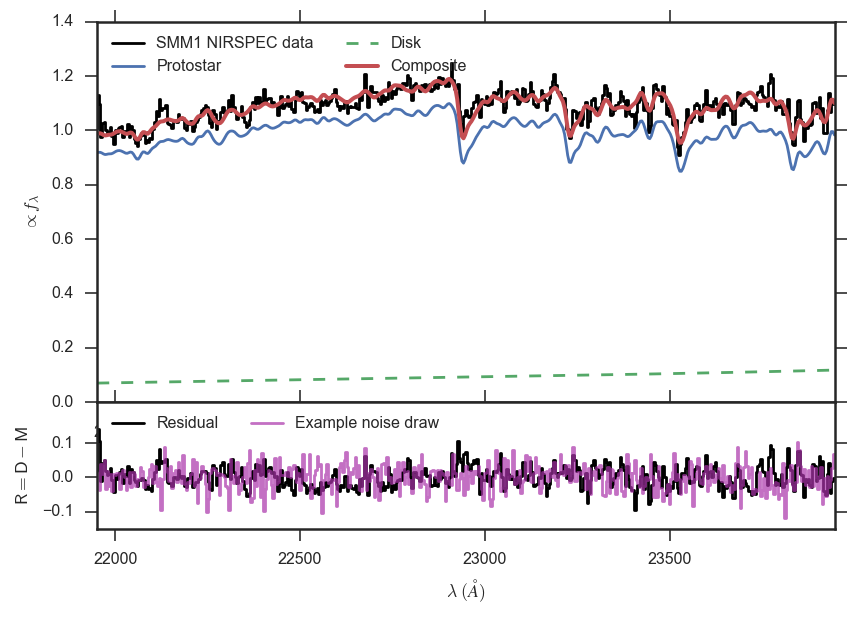

In [34]:
nz_draw = multivariate_normal(net_model, CC) # undo the mean subtraction override...
this_draw = nz_draw.rvs()
this_comp = star+disk

fig1 = plt.figure()
frame1=fig1.add_axes((.1,.3,.8,.6))
frame1.step(wl, fl, 'k', label='SMM1 NIRSPEC data')
frame1.plot(wl, star, label = 'Protostar')
frame1.plot(wl, disk, '--', label = 'Disk')
#plt.plot(wl, extinc, label = 'extinction')
#plt.plot(wl, cheb, label = 'cheb')
frame1.plot(wl, this_comp, label = 'Composite', lw=2)
plt.xlim(wl[0], wl[-1])
plt.ylabel(r'$ \propto f_\lambda $')
frame1.legend(loc='upper left', ncol=2)
frame2=fig1.add_axes((.1,.1,.8,.2))   
frame2.step(wl, resid, 'k', label='Residual')
frame2.step(wl, this_draw-this_comp, alpha=0.7, color='#AA33AA', label='Example noise draw')
#frame2.hlines(0, wl[0], wl[-1], colors='#AA0000', linestyles='solid', lw=1)
frame2.set_xlim(wl[0], wl[-1])
frame2.set_ylim(-0.15, 0.22)
frame2.yaxis.set_major_locator(FixedLocator([-0.1, 0.0, 0.1]))
frame2.set_ylabel('$\mathsf{R} = \mathsf{D}-\mathsf{M}$')
frame2.legend(loc='upper left', ncol=2)
frame2.set_xlabel('$\lambda \; (\AA)$')
plt.savefig('../document/figures/SMM1_spectrum.pdf', bbox_inches='tight')